# An experiment on numerical stability
<div class="alert alert-block alert-success">
<b>Goals:</b> 

* Use a toy example to demonstrate how certain operations can yield unstable or null results.
* Use logarithms to transform the same computation to yield a stable execution.
</div>

<div class="alert alert-block alert-info">
<b>Content:</b> In this notebook, we demonstrate how logarithms can be used to make computations stable.
</div>

Think of a product of small values (e.g. probabilities).

For example in Naive Bayes, we multiply many such small values.

Here, we use a toy example (instead of many small numbers, we use few very small numbers) to demonstrate an effect: 

Compute $a=2 * 10^{(-100)} * 9^{(-100)} * 8^{(-100)} * 
7^{(-100)}$.

__Toy Example Idea__

* Think of this value $a$ as a product of 
    * a factor ($2$) and 
    * four (small) probabilities. 
* This value $a$ occured during the execution of an algorithms. 
* Since we know the four probabilities, we want to retrieve the factor $2$ from $a$.
* Basically, we want to compute:
$$b=\frac{a}{10^{(-100)} * 9^{(-100)} * 8^{(-100)} * 
7^{(-100)}}$$.
* The result should be $b=2$.


## Create Small Values (probabilities)

In [1]:
# create the small probabilities
p_10=10**-100
p_9=9**-100
p_8=8**-100
p_7=7**-100

p_10, p_9, p_8, p_7

(1e-100, 3.764861949599026e-96, 4.909093465297727e-91, 3.091690408090221e-85)

## Let's do some Computations

In [2]:
a=2*p_10 * p_9 * p_8 * p_7 # should be a small value larger than 0
a

0.0

In [3]:
a/(p_10 * p_9 * p_8) # should yield 2*p_7

0.0

In [ ]:
#b=a/(p_10 * p_9 * p_8 * p_7) # should yield 2

ZeroDivisionError: float division by zero

In [5]:
try:
    b=a/(p_10 * p_9 * p_8 * p_7) # should yield 2
    print(b)
except ZeroDivisionError:
    print("Due to rounding, the denominator is actually 0.")

Due to rounding, the denominator is actually 0.


## Let's try the same with logarithms
log(10^(-100)) = -100* log(10)

In [6]:
import math

Instead of computing the probabilities directly, we use their logarithms:
$$\log(a)=\log(2 \cdot p_{10} \cdot p_9 \cdot p_8 \cdot p_7) = \log(2)+\log(p_{10}) + \log(p_9) + \log(p_8) + \log(p_7) $$

Hereby, we use $ \log(7^{-100}) = -100*\log(7)$

In [7]:
log_p_10=-100*math.log(10)
log_p_9=-100*math.log(9)
log_p_8=-100*math.log(8)
log_p_7=-100*math.log(7) 

In [8]:
#a=2*p_10 * p_9 * p_8 * p_7 # should be a small value larger than 0

log_a=math.log(2) + log_p_10 + log_p_9 + log_p_8 + log_p_7
log_a

-851.8229889259815

We get a non-zero result. 
Now lets try retrieving the factor 2 from the product by "dividing" by the other factors

In [9]:
#b=a/(p_10 * p_9 * p_8 * p_7)

log_b = log_a - (log_p_10 + log_p_9 + log_p_8 + log_p_7)
log_b

0.693147180560004

In [10]:
math.e**log_b # should yield 2

2.0000000000001172

We can retrieve the orginal value of 2 almost precisely.

<div class="alert alert-block alert-info">
<b>Take Aways:</b> 

* Using logarithms, we use sums of logarithms instead of products.
* Using logarithms, we can compute with small numbers instead of extremely small numbers, thus avoiding precision loss.
</div>

<div class="alert alert-block alert-success">
<b>Play with:</b> 

* Change the values of the probabilities.
* Observe different behavior in the results of the plain computation (without logs).
* Verify that the log-based computation still yields the same result (up to some small rounding errors).
</div>


Exercise 1. ( Computing Powers, Roots, Logarithms)
Solve the following problems:
1. 1.65
2. log2 2048
3. log3 243
4. 4?81
5. log8
5
10.48576

In [19]:
import numpy as np


In [28]:
results = (
    1.6 ** 5,                      # 1. 1.6 to the power of 5
    np.log2(2048),                 # 2. log2 of 2048
    np.log(243) / np.log(3),       # 3. log3 of 243
    81 ** (1/4),                   # 4. 4th root of 81
    np.log(10.48576) / np.log(8/5) # 5. log(10.48576) / log(8/5)
)

# Print the results
print(results)


(10.485760000000003, 11.0, 4.999999999999999, 3.0, 5.0)


Exercise 2. (Power and Logarithm Computation Rules)
Express the following terms using log 𝑥, log 𝑦, and log 𝑧.
Note: In situations like this, we do not specifically denote the base. It is implicitly assumed, that all
logarithms have the same base.
1. log 𝑥𝑦𝑧
2. log 5a𝑥4𝑦 ́2

In [32]:
x=2
y=3
z=4

print(
    np.log(x) + np.log(y) + np.log(z),
    np.log(x*y*z))

print(
    (1/5)*(4*np.log(x)+(-2*np.log(z)))
)

3.1780538303479453 3.1780538303479458
0.0


Exercise 3. (Equations with Logarithms)
Solve for 𝑥!
1. 22𝑥 ́1 “ 512
2. log𝑎 1
𝑎 “ 𝑥
3. log9 𝑥 “  ́1
2
4. log3p𝑥 `25q ́log3p𝑥  ́1q “ 3

Exercise 4. (Equation with Logarithms)
Solve for 𝑥, analytically and by plotting the solution in Python: 2 log 𝑥 “ log 2 `logp3𝑥  ́4q
For plotting the functions, use the numpy command arange to create a list of 𝑥-values.
Exercise 5. (Epidemic Spreading Model)
Consider the following simplified model of epidemic spreading:
• For a disease, the value 𝑅 determines the number of persons, a sick person will infect on
average.
• In every new step, each currently infected person infects 𝑅 further persons and then stops
being contagious.
• Assume that the disease is discovered, when 100 patients are in their contagious state.
1. Create a mathematical model for the above spreading process – a function for the number of
new infections in each step.
2. Plot the number of new infections with every step for different values of 𝑅.
3. Describe three qualitatively different behaviors depending on the value for 𝑅.
4. Describe the influence of small modifications to 𝑅, e.g. 1.7 vs. 1.75.


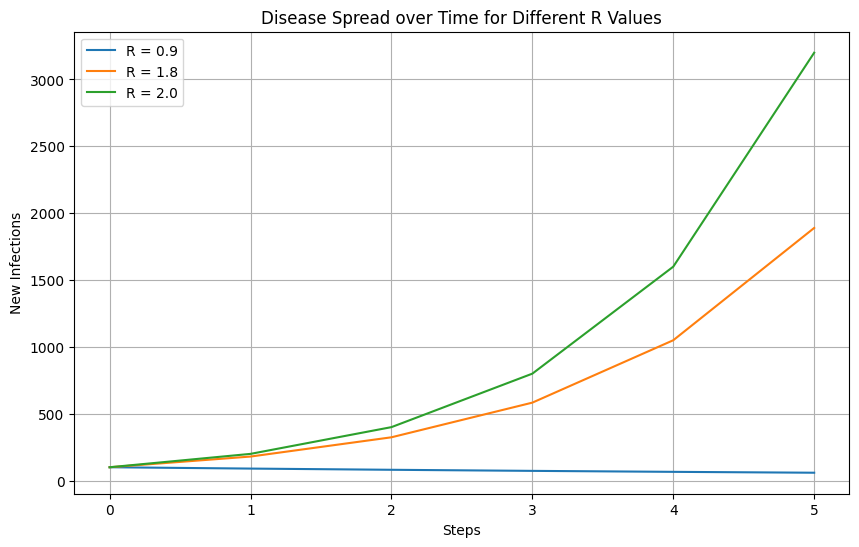

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial number of infected individuals
I0 = 100

# Define a function to model the spread of infection
def infection_model(R, steps):
    return [I0 * (R ** n) for n in range(steps)]

# Plot the number of infections for different values of R
def plot_infections(R_values, steps):
    plt.figure(figsize=(10, 6))
    for R in R_values:
        infections = infection_model(R, steps)
        plt.plot(range(steps), infections, label=f'R = {R}')
    
    plt.xlabel('Steps')
    plt.ylabel('New Infections')
    plt.title('Disease Spread over Time for Different R Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define different R values to visualize the behavior
R_values = [0.9, 1.8, 2.0]
steps = 6

# Plot the infections for the chosen R values
plot_infections(R_values, steps)
